In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import csv
import os

In [2]:
data_file_path = os.path.abspath(os.path.join(os.pardir,'data','cleaned_AG.csv'))
data = pd.read_csv(data_file_path)
data.head()

,News Category,Documents,Word Count,Noun Phrases,Noun Count,Adjective Count,Verb Count
0,business,wall st bear claw back black reuters reuters s...,18,4,12,3,2
1,business,carlyle look toward commercial aerospace reute...,27,5,15,4,3
2,business,oil economy cloud stock outlook reuters reuter...,24,5,17,4,2
3,business,iraq halt oil export main southern pipeline re...,28,3,19,6,3
4,business,oil price soar time record posing new menace e...,28,4,16,7,3


# Word Cloud by News Category

In [3]:
#array of unique news categories
news_categories = data['News Category'].unique()

#creates a dict of news categories and all text concatenated in a single string
categories_joined = {}
for category in news_categories:
    categories_joined[category] = " ".join(data[data["News Category"] == category]["Documents"])

In [4]:
#title dimension for pyplot
title_dic = {'fontsize': 250,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

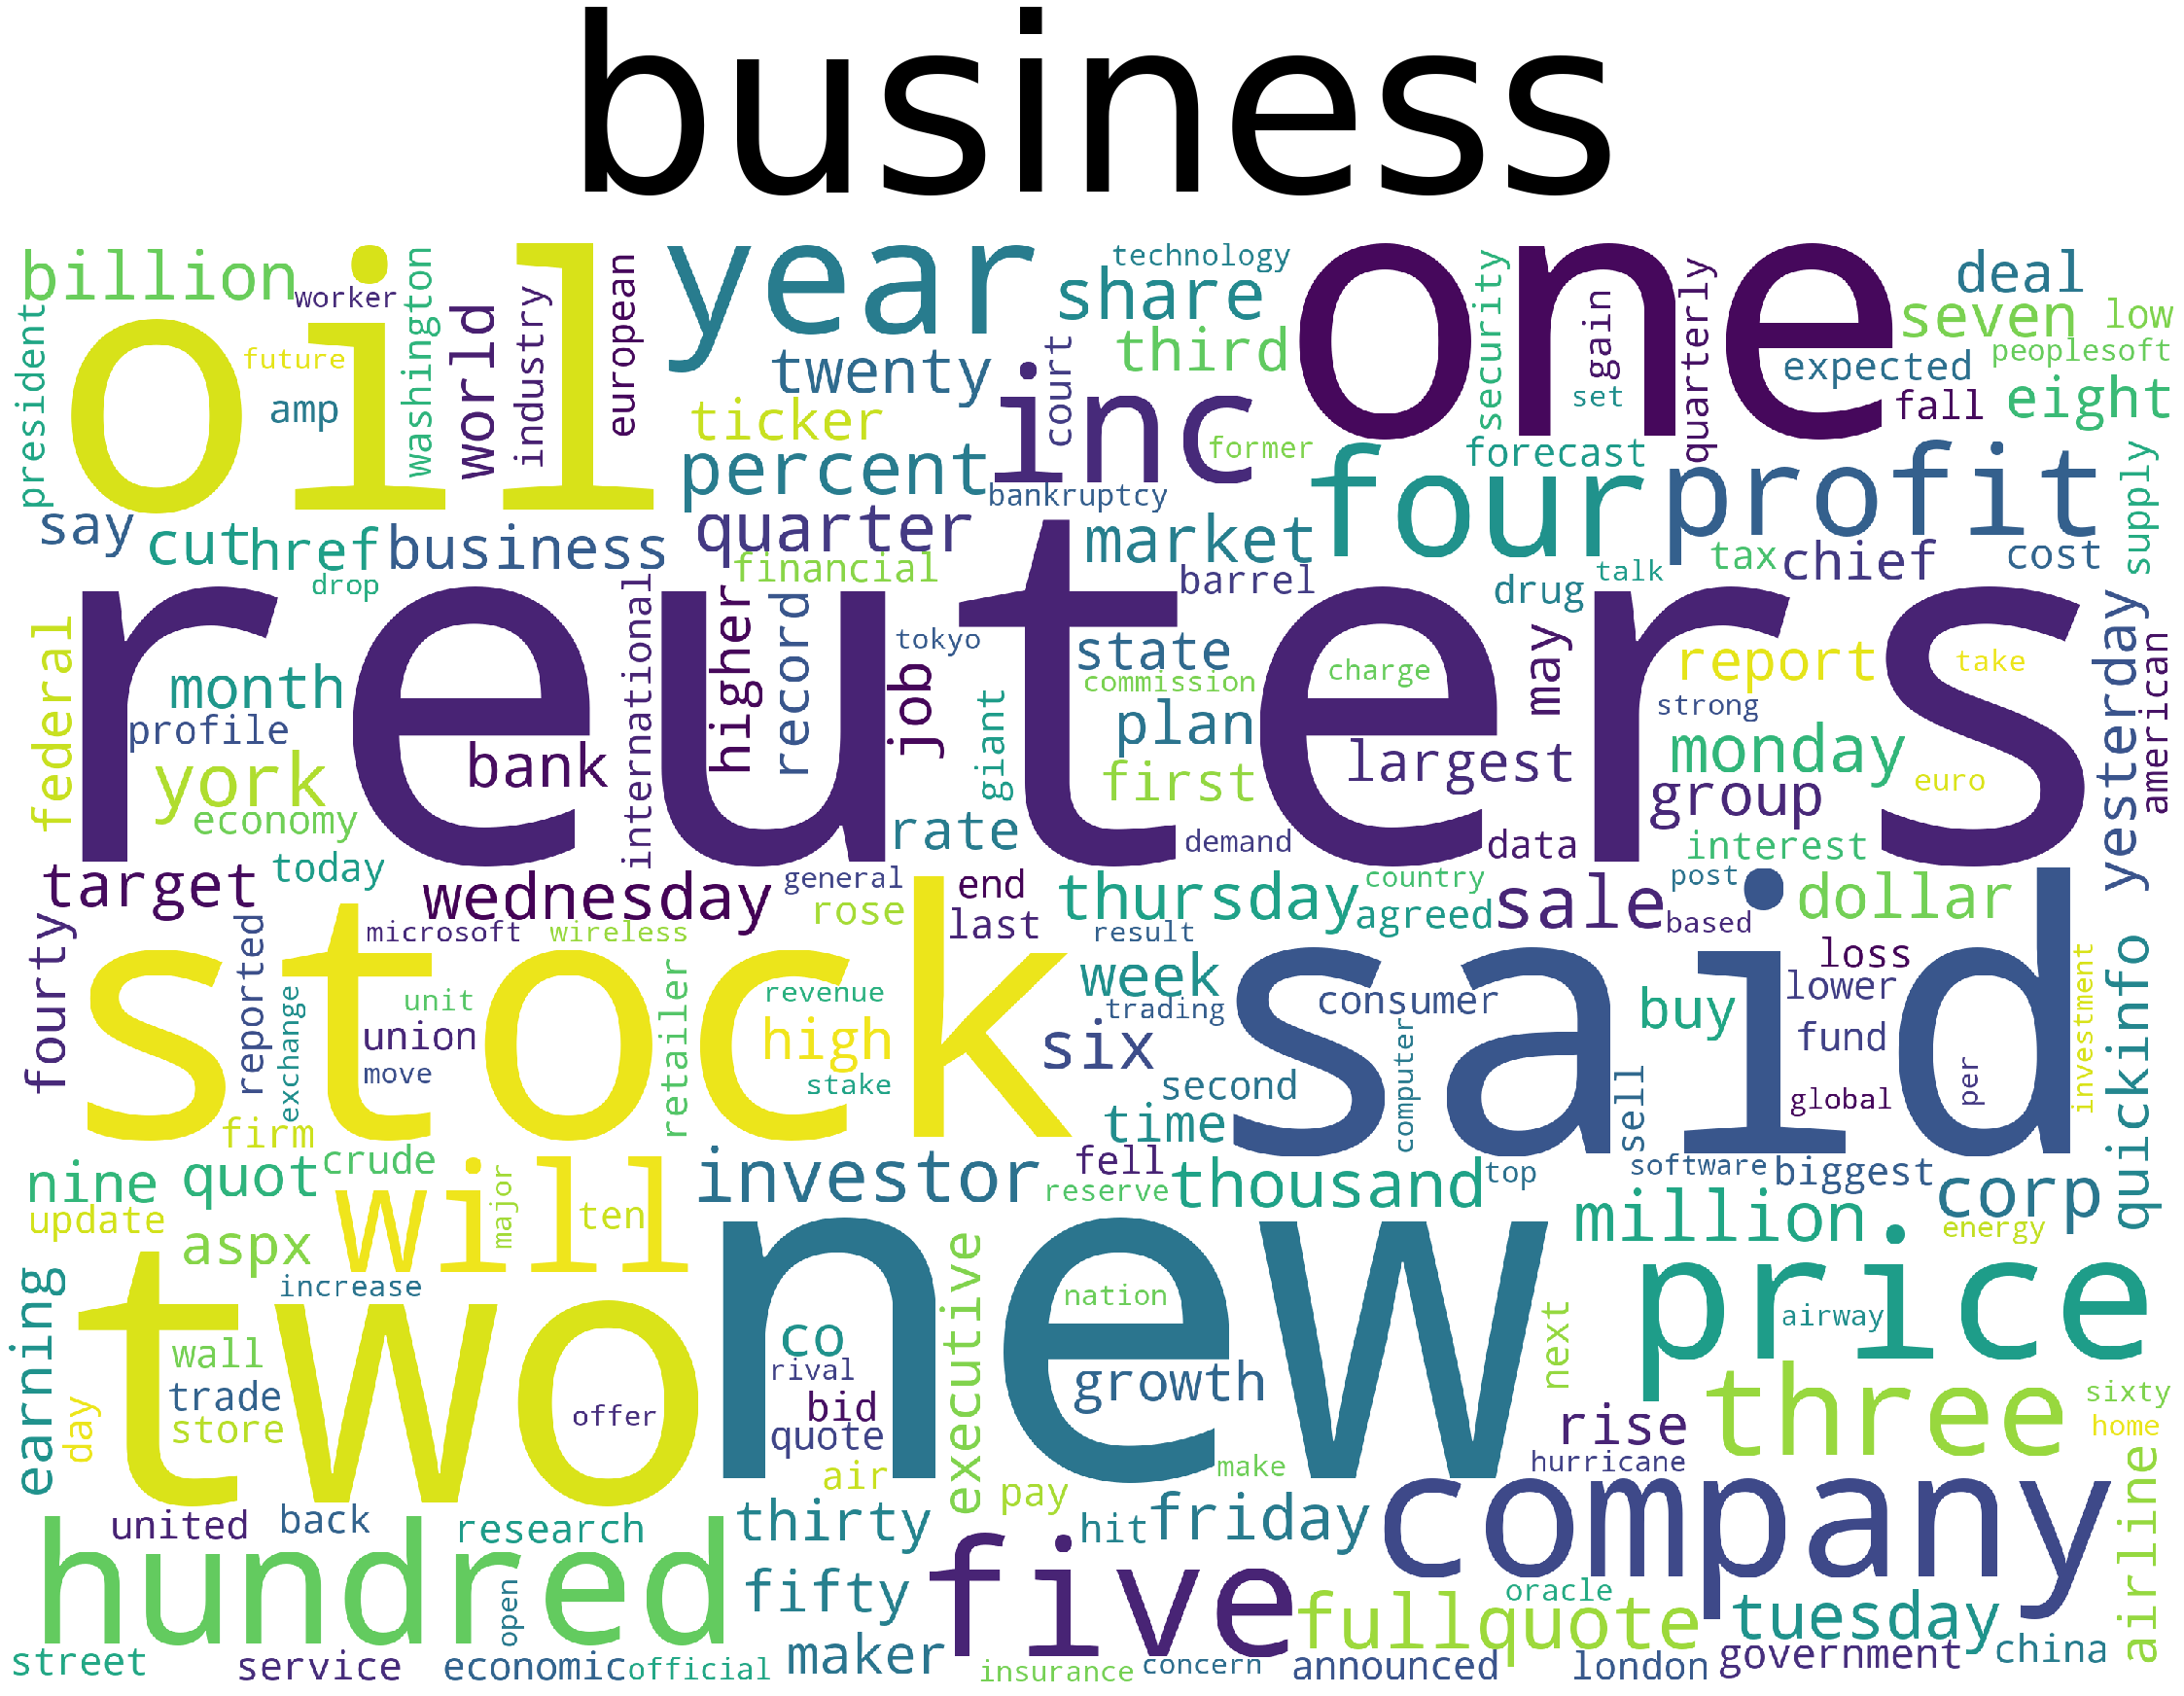

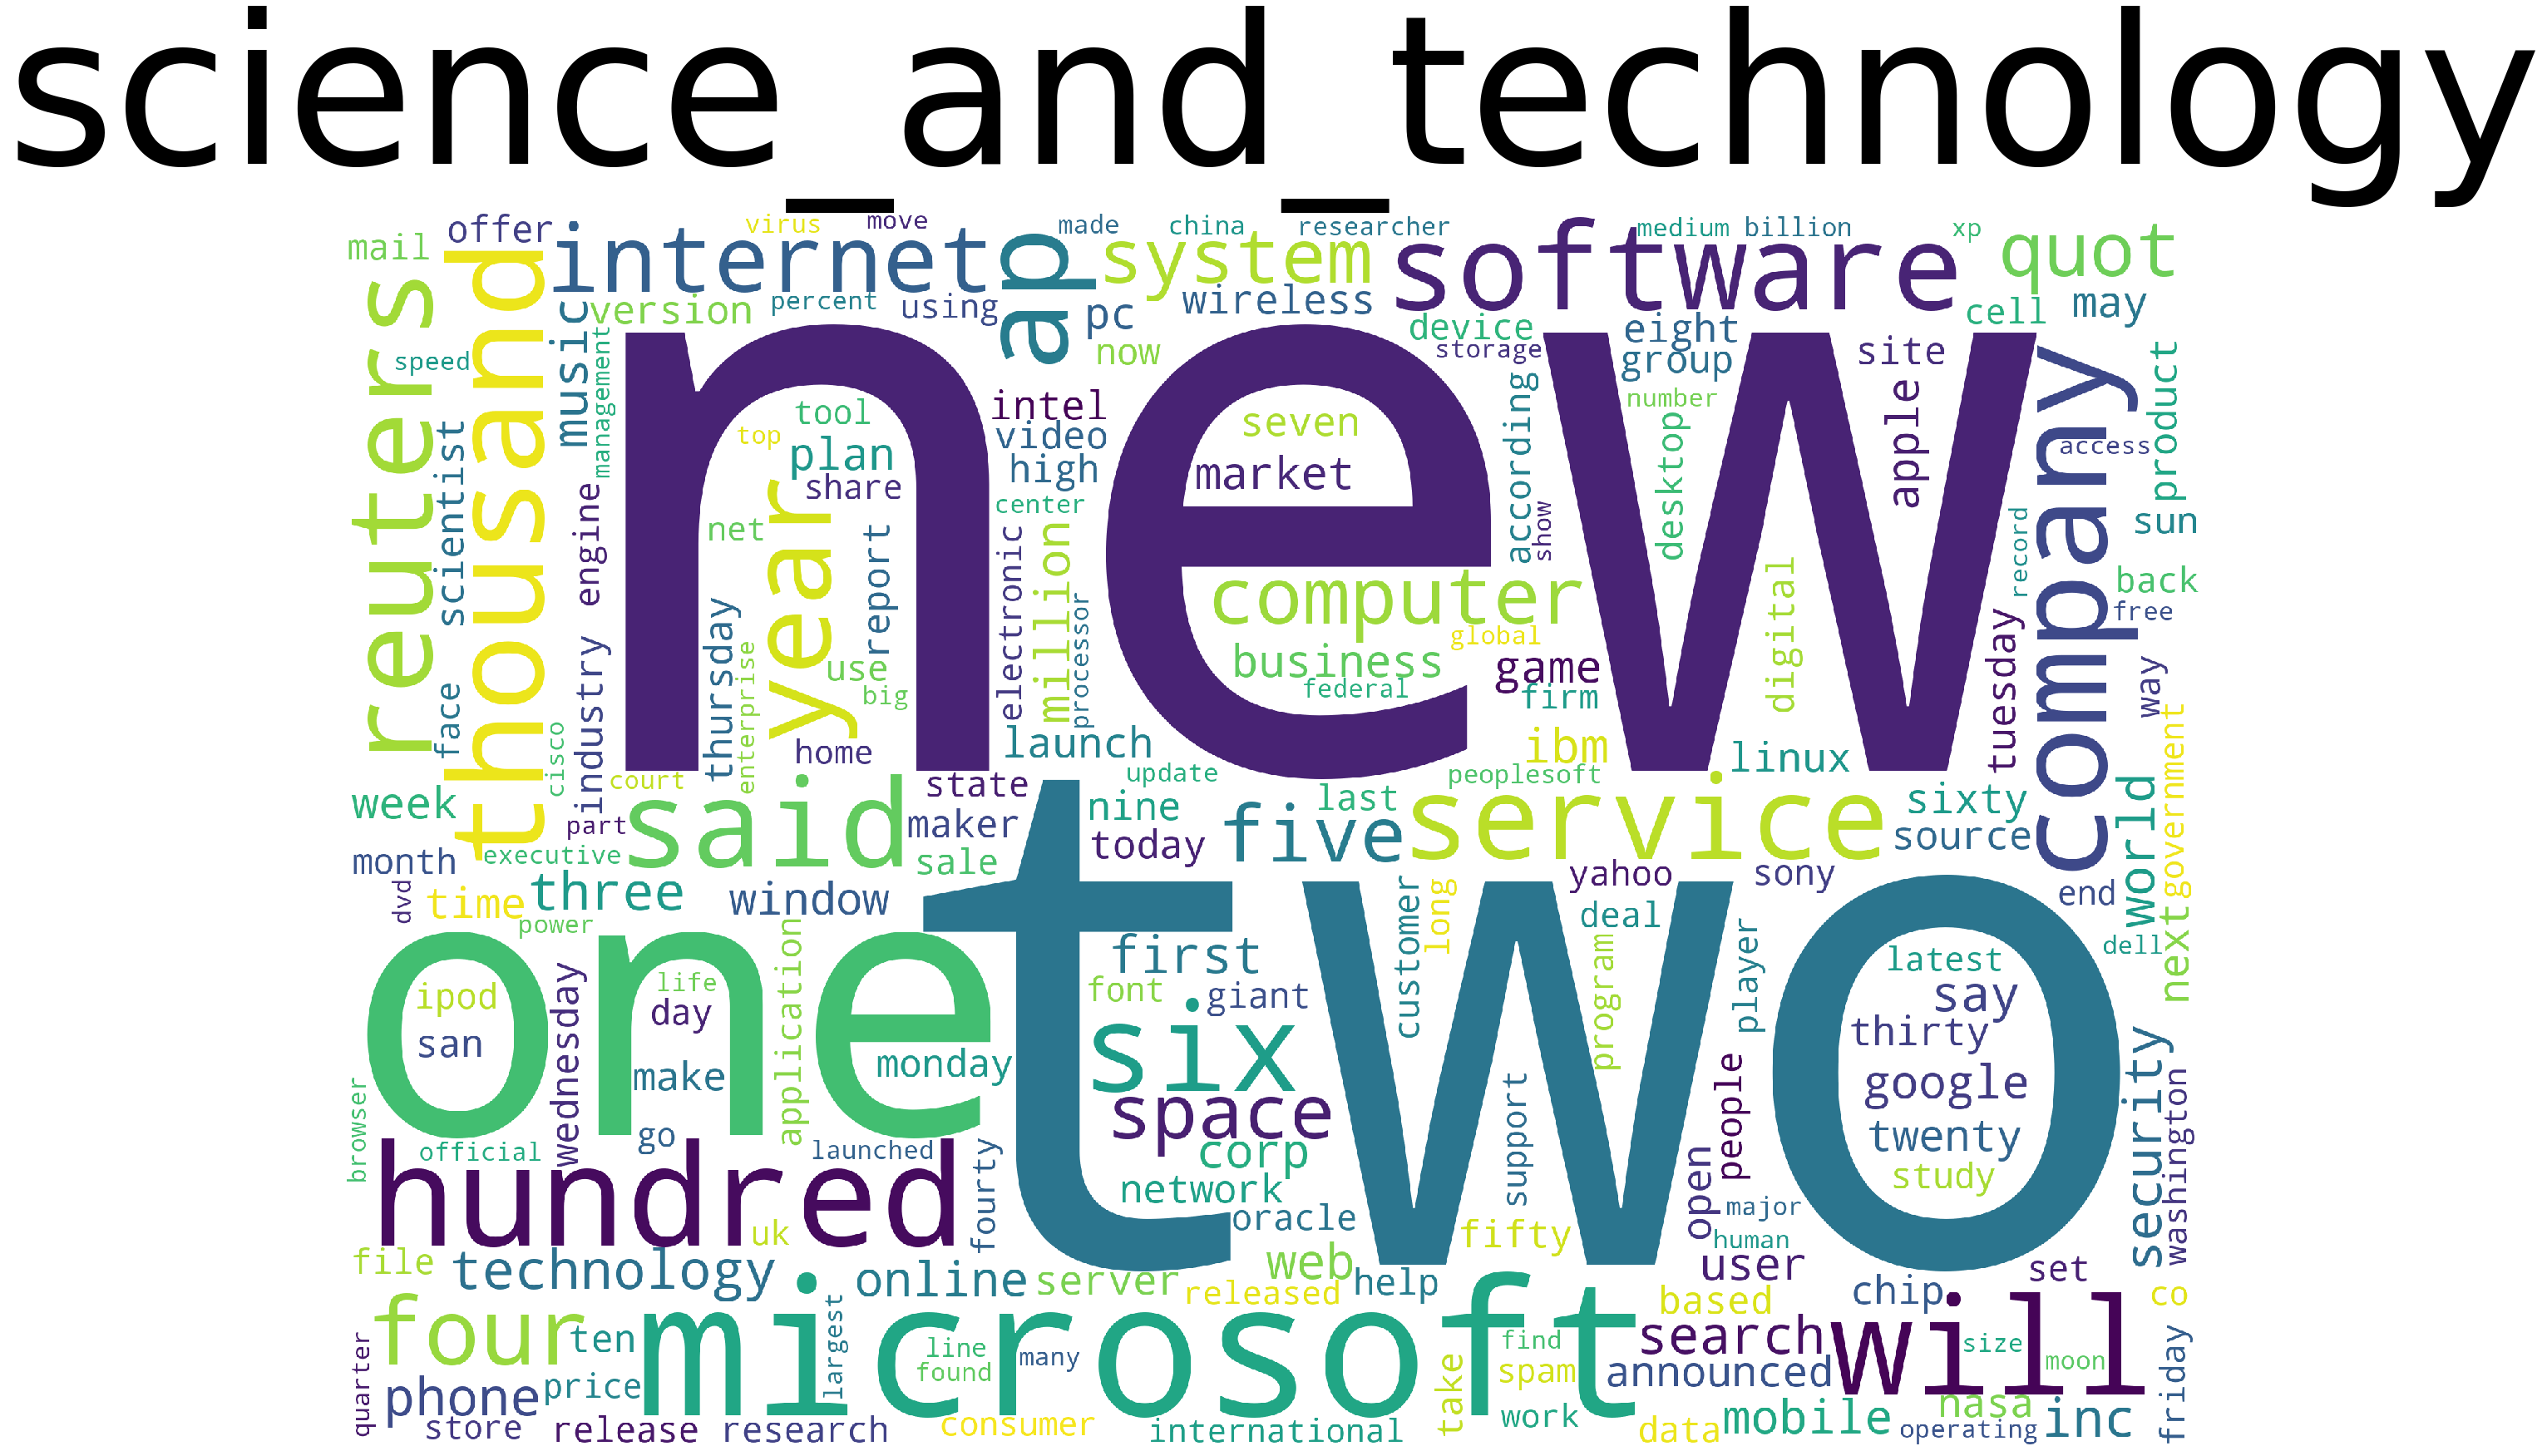

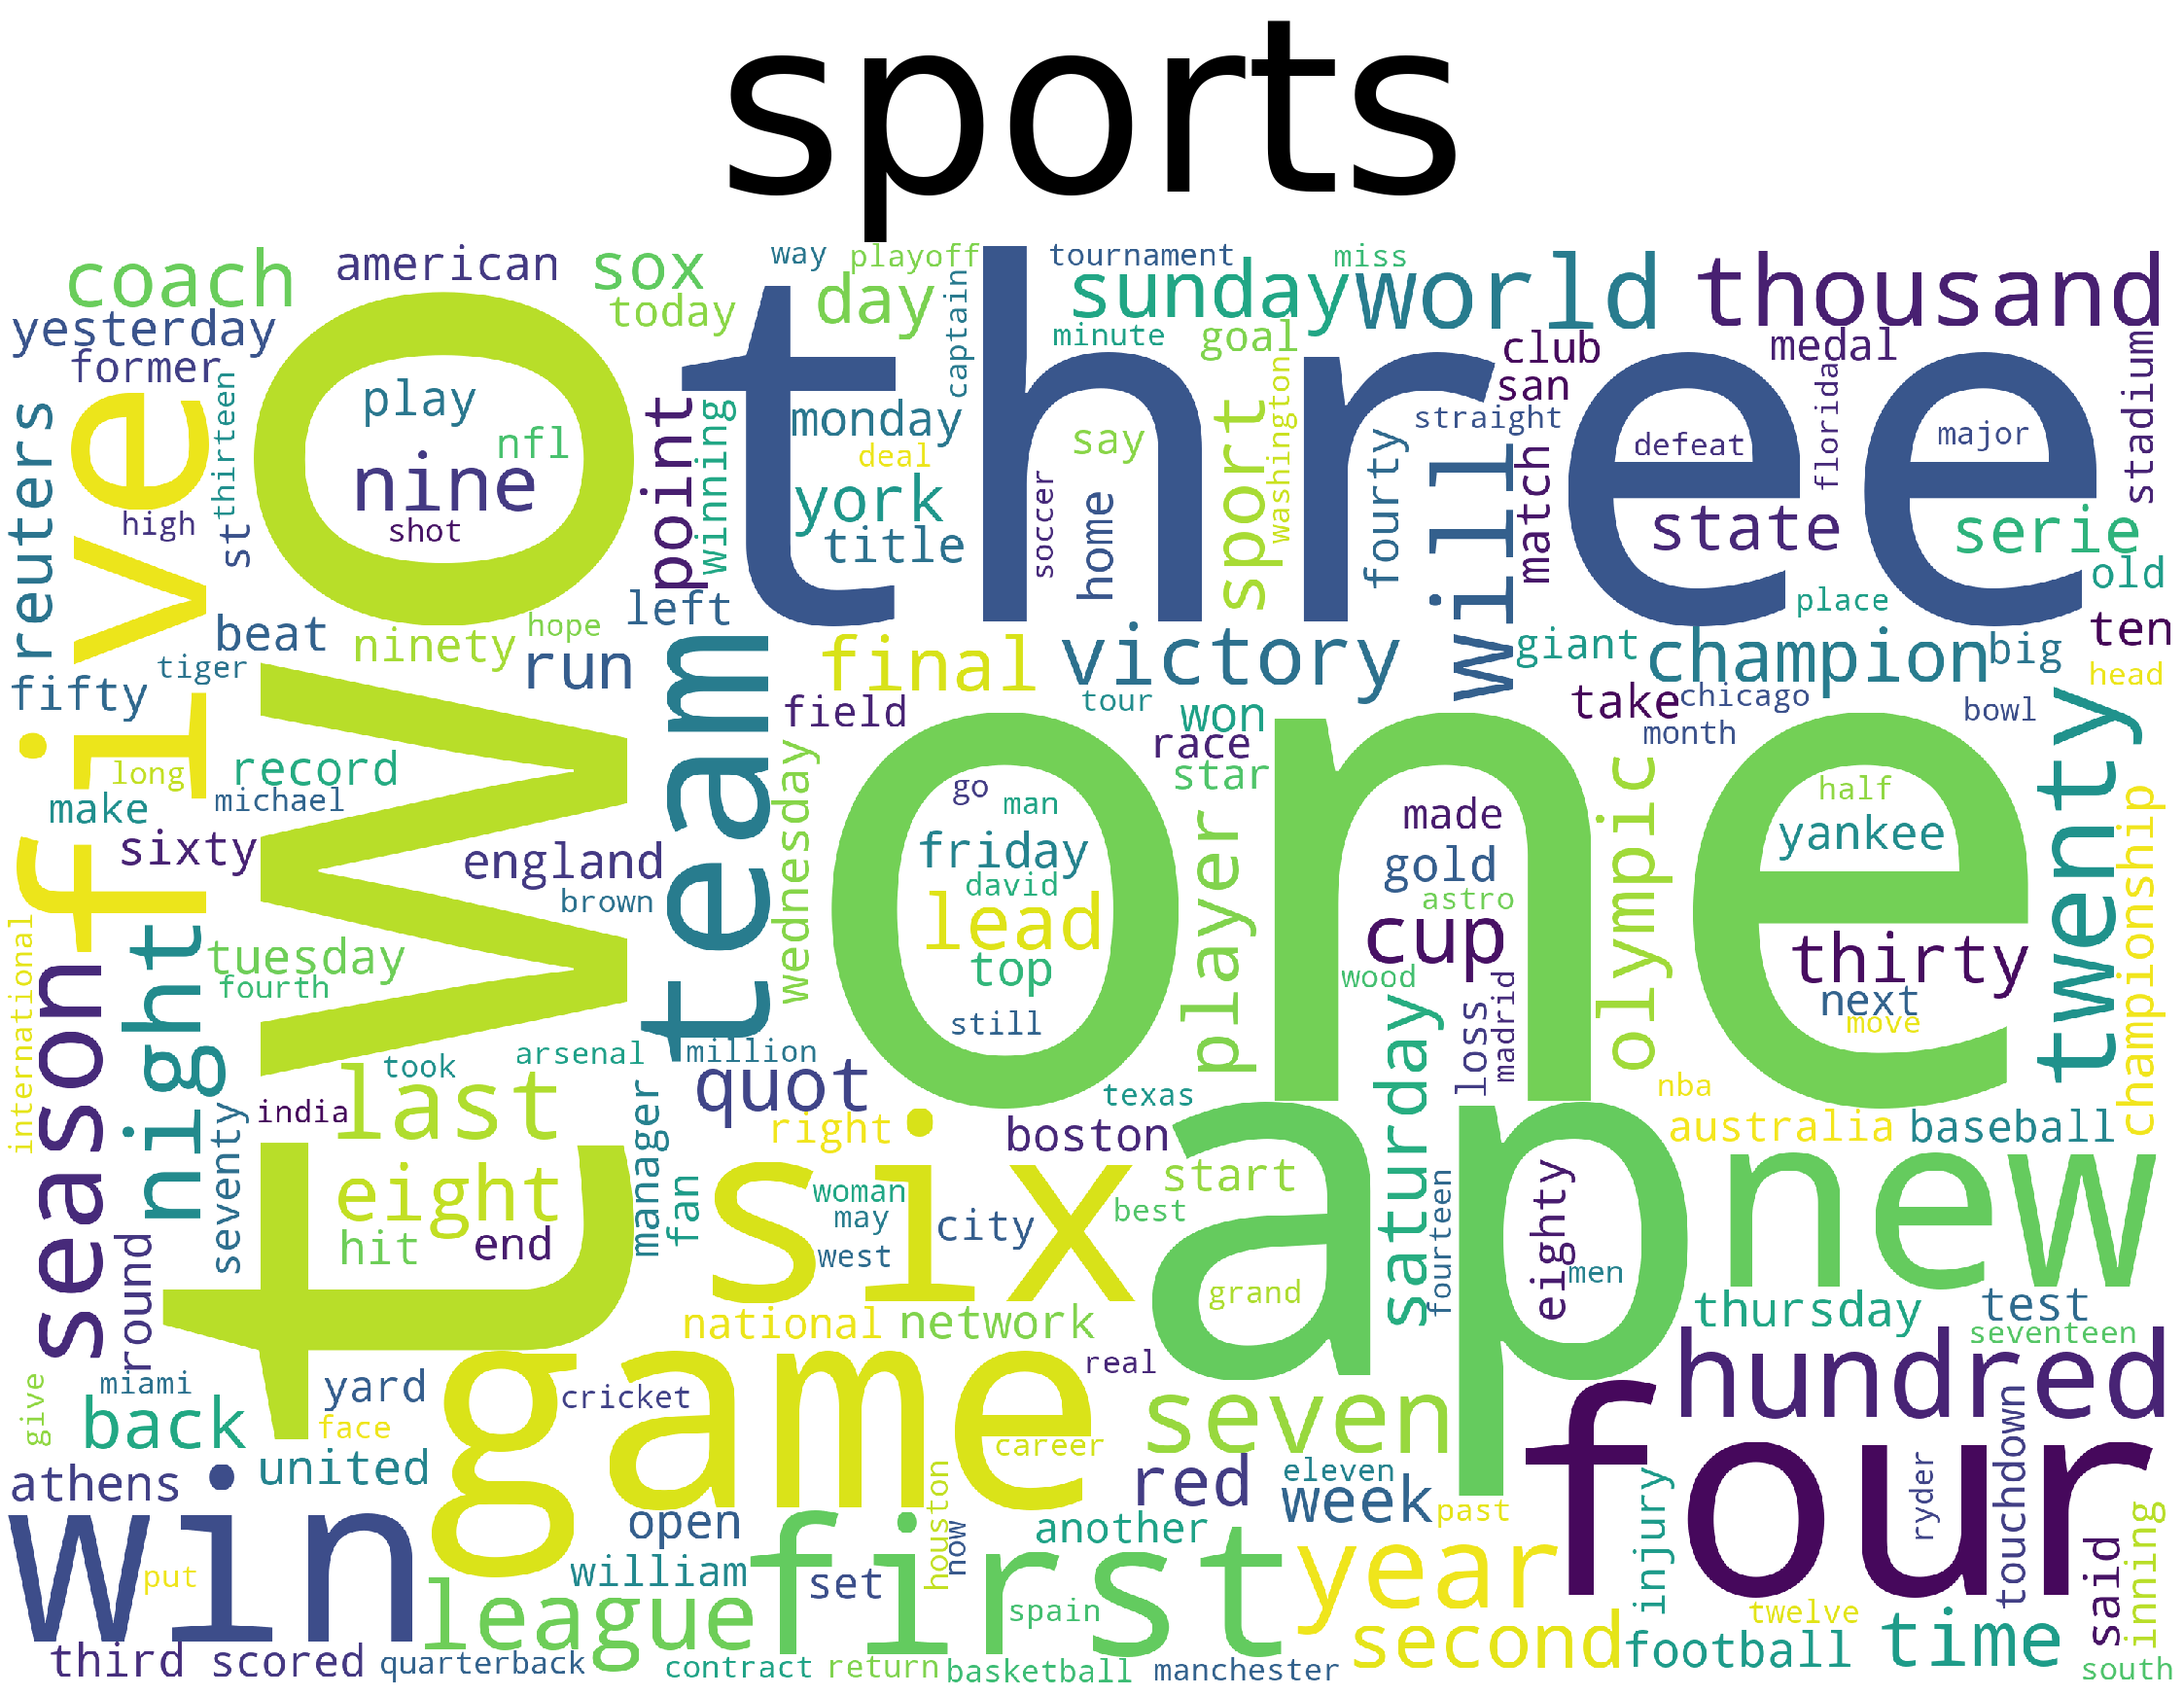

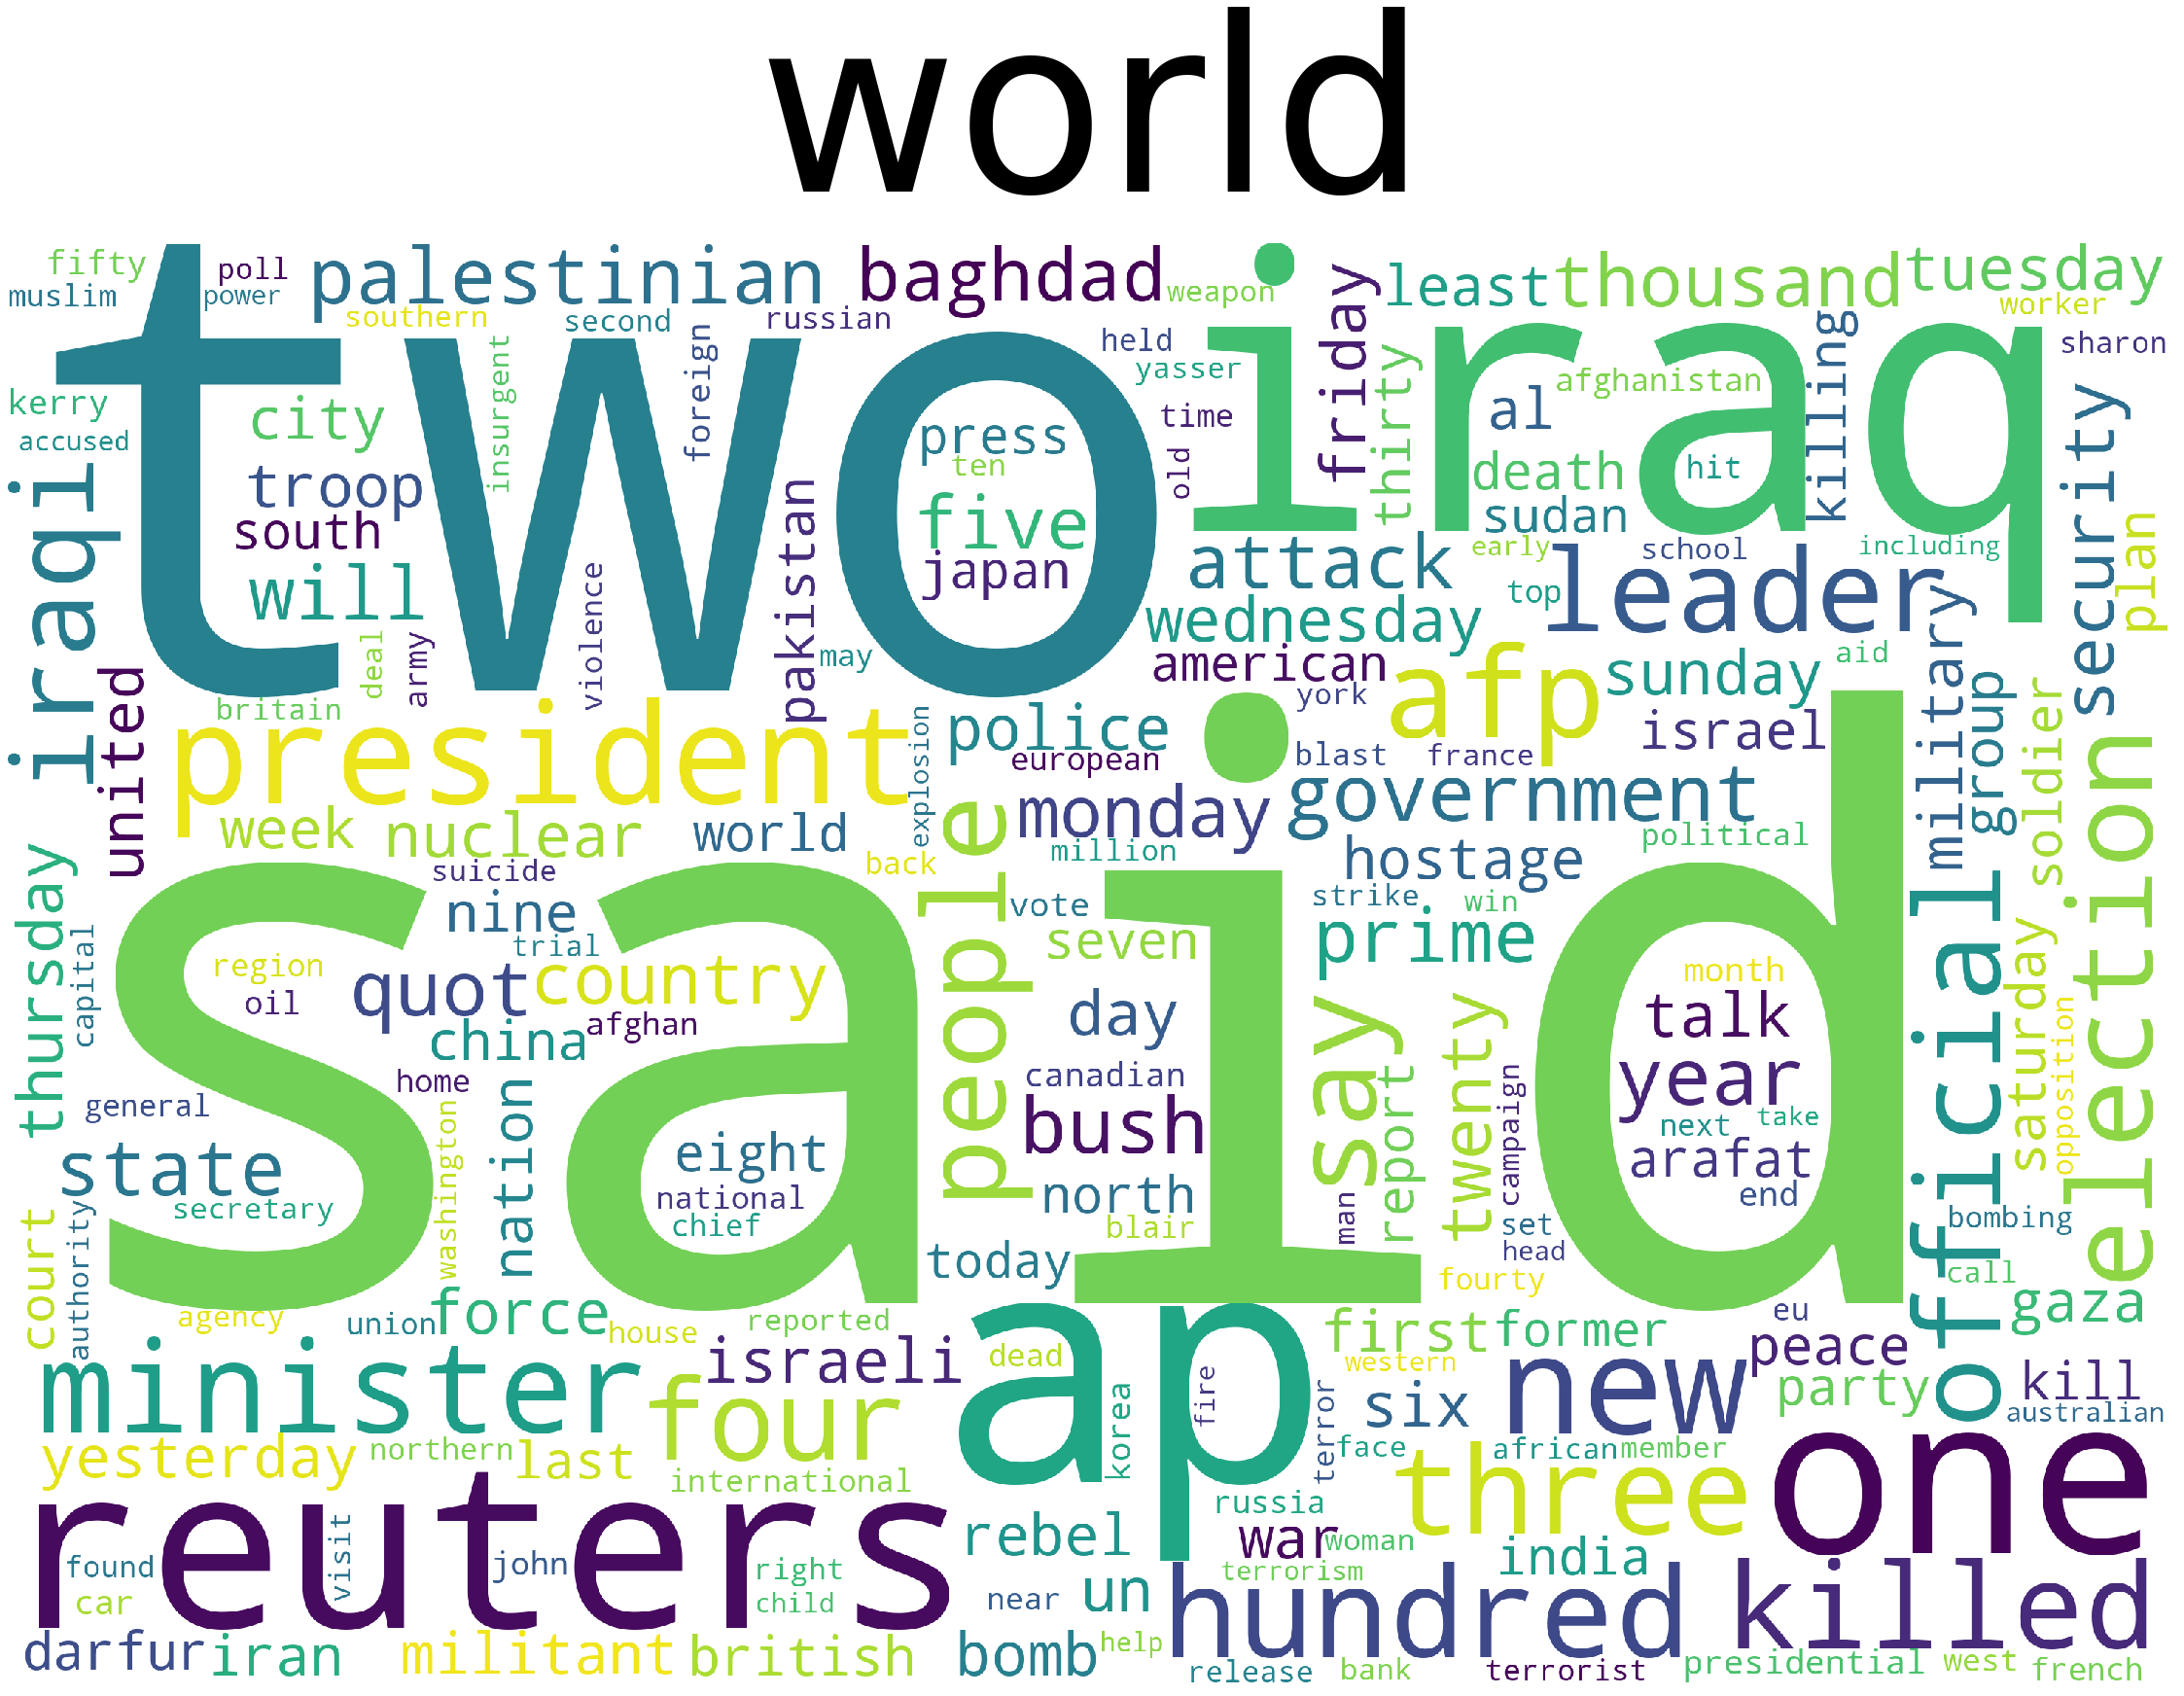

In [5]:
#create a word cloud for each news category and save as png
for category in news_categories:
    text = categories_joined[category]
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(category, fontdict = title_dic)
    image_file_path = os.path.abspath(os.path.join(os.pardir,'images','{}_word_cloud.png'.format(category)))
    plt.savefig(image_file_path, bbox_inches='tight')
    plt.show()

# Word Count by Category

In [7]:
feat_lst = ['Word Count','Noun Phrases','Noun Count','Adjective Count','Verb Count']
feat_dict = {}

for feature in feat_lst:
    feat_dict[feature] = data.groupby(['News Category'])[feature].mean().tolist()
    
feat_dict

{'Word Count': [27.611473354231975,
  26.526426332288402,
  26.218119122257054,
  26.869404388714734],
 'Noun Phrases': [4.511473354231975,
  4.465956112852664,
  4.336426332288402,
  4.640094043887148],
 'Noun Count': [15.087398119122257,
  14.449341692789968,
  13.447836990595611,
  13.897805642633228],
 'Adjective Count': [5.128401253918495,
  4.868777429467085,
  4.9761755485893415,
  5.978902821316614],
 'Verb Count': [4.437805642633228,
  4.350188087774295,
  4.285047021943574,
  4.649655172413793]}

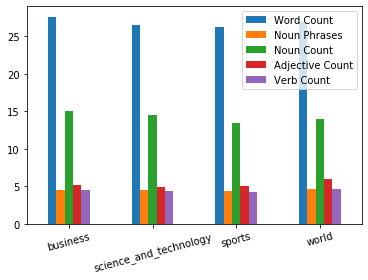

In [8]:
df = pd.DataFrame(feat_dict, index=news_categories)
ax = df.plot.bar(rot=15)

In [9]:
image_file_path = os.path.abspath(os.path.join(os.pardir,'images','features_average_bar_plot.png'))
ax.figure.savefig(image_file_path)